In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\suert\OneDrive\Escritorio\Nueva carpeta\limpio.csv")
df

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,70172,13,460,3,4,3,1,5,3,5,...,0,0,1,1,0,0,1,0,0,1
1,5047,25,235,3,2,3,3,1,3,1,...,0,0,1,0,1,1,0,1,0,0
2,110028,26,1142,2,2,2,2,5,5,5,...,1,1,0,1,0,1,0,1,0,0
3,24026,25,562,2,5,5,5,2,2,2,...,0,1,0,1,0,1,0,1,0,0
4,119299,61,214,3,3,3,3,4,5,5,...,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,34,526,3,3,3,1,4,3,4,...,0,0,1,0,1,1,0,1,0,0
129876,71167,23,646,4,4,4,4,4,4,4,...,1,0,1,1,0,1,0,1,0,0
129877,37675,17,828,2,5,1,5,2,1,2,...,0,1,0,1,0,0,1,0,1,0
129878,90086,14,1127,3,3,3,3,4,4,4,...,1,0,1,1,0,1,0,1,0,0


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [4]:
# Asegúrate de que tus características numéricas estén en una matriz NumPy o DataFrame
X = df.drop(["satisfaction"], axis=1)

# Normaliza las características utilizando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
pca= PCA()


In [13]:
pca.fit(X_scaled)

PCA()

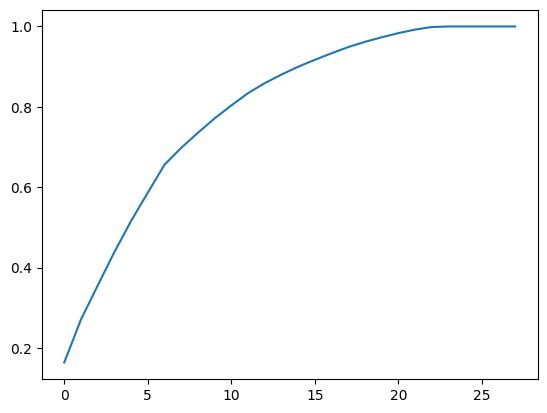

In [17]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [19]:
# Calcula la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Suma acumulativa de la varianza explicada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Imprime la varianza explicada y acumulativa
print("Varianza explicada por cada componente principal:")
print(explained_variance_ratio)
print("\nVarianza acumulativa:")
print(cumulative_variance_ratio)


Varianza explicada por cada componente principal:
[0.16356722 0.10696451 0.08442468 0.08327772 0.07758771 0.07034496
 0.06955683 0.0419847  0.03756649 0.03583024 0.03221773 0.03066874
 0.02479194 0.02151014 0.01941275 0.01719371]

Varianza acumulativa:
[0.16356722 0.27053173 0.35495641 0.43823413 0.51582184 0.5861668
 0.65572363 0.69770833 0.73527482 0.77110507 0.8033228  0.83399154
 0.85878348 0.88029362 0.89970637 0.91690009]


In [7]:
X = pd.DataFrame(X_pca)
y = df["satisfaction"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

param_grid = {                   
                     "penalty": ["l1","l2"], 
                     "C": [0.1, 0.5, 1.0, 5.0], 
                     
                     "max_iter": [50,100,500], 
                     
                     "solver": ["liblinear"] 
                    }


logreg = LogisticRegression()

grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(scaler_X_train, y_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_model= grid_search.best_estimator_

y_pred = best_model.predict(scaler_X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo con los mejores hiperparámetros:", accuracy)

Mejores hiperparámetros: {'C': 5.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Precisión del modelo con los mejores hiperparámetros: 0.8738065906991068


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()


param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)


y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo con los mejores hiperparámetros:", accuracy)

Mejores hiperparámetros: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisión del modelo con los mejores hiperparámetros: 0.8832383738835848


In [21]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {"n_estimators": [100],    
              "max_depth": [3,4,5,6,10,15,17],
               "max_features": ["sqrt", 3, 4] 
             }

rdf = RandomForestClassifier()


grid_search = GridSearchCV(estimator=rdf, param_grid=param_grid, cv=5)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)


best_rdf = RandomForestClassifier(**best_params)
best_rdf.fit(X_train, y_train)


y_pred = best_rdf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo con los mejores hiperparámetros:", accuracy)


Mejores hiperparámetros: {'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 100}
Precisión del modelo con los mejores hiperparámetros: 0.9264320911610717


In [ ]:
from sklearn.externals import joblib

# Supongamos que "modelo" es tu objeto de modelo entrenado
joblib.dump(best_rdf, 'randon_forest_con_pca_y_grid_search.pkl')
